In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic' # win
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.unicode_minus'] = False

In [32]:
df = pd.read_csv('drinks.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [33]:
df['continent'].fillna('OT', inplace=True)

In [35]:
df['total_servings'] = df['beer_servings'] + df['spirit_servings'] + df['wine_servings']

In [40]:
# 대륙별 술 총소비량
c_df = df.groupby('continent')['total_servings'].sum()

In [44]:
c_df.index

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

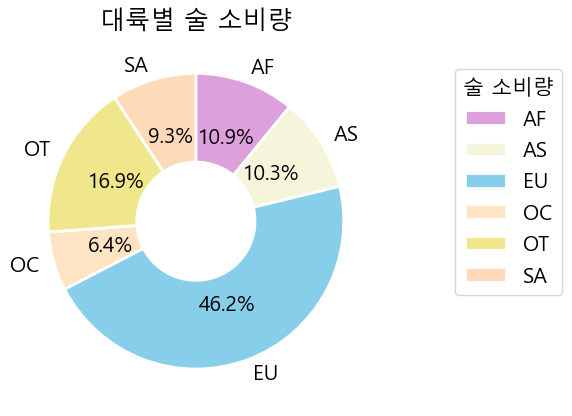

In [54]:
colors = ['plum','beige','skyblue','bisque','khaki','peachpuff']
wedgeprops = {'width':0.6, 'edgecolor':'white', 'linewidth':2}
plt.title('대륙별 술 소비량')
plt.pie(c_df, labels=c_df.index, colors=colors, autopct='%.1f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops)
plt.legend(loc=(1.2, 0.3), title='술 소비량')
plt.show()

In [73]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
 6   total_servings                193 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 10.7+ KB


In [81]:
# total_litres_of_pure_alcohol
# 전체 평균보다 많은 알코올 도수를 섭취하는 대륙을 출력하세요.
# 1. 전체 평균 도수 구하기
total_mean = df['total_litres_of_pure_alcohol'].mean()
# 2. 대륙별 도수 평균 구하기
continent_mean = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# 3. 필터 구하기
filt = continent_mean > total_mean
filt
# 4. 필터 적용해서 출력
continent_mean[filt]
# 5. 평균보다 beer_servings이 가장 높은 대륙
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False).head(1)
df.groupby('continent')['beer_servings'].mean().max() # index의 해당되는 value값
df.groupby('continent')['beer_servings'].mean().idxmax() # index가 출력



'EU'

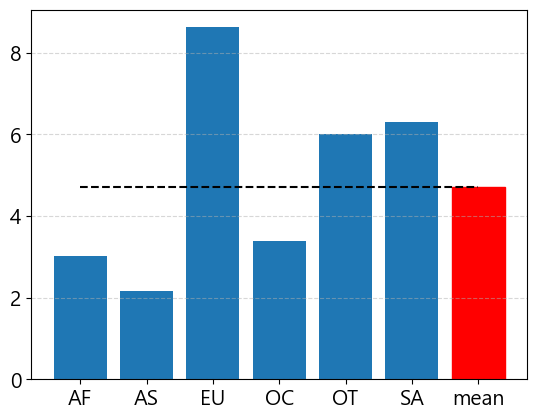

In [114]:
# 대륙별 total_litres_of_pure_alcohol 막대그래프로 출력하세요.
# 마지막에는 평균 막대그래프를 출력하세요.
# 1. total_litres_of_pure_alcohol를 평균 구하세요.
data = df['total_litres_of_pure_alcohol'].mean()
n_data = [data]*7
# 2. 대륙별 평균을 구하세요
con_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# 3. 컬럼에 대륙별 평균을 추가하세요 mean
con_df['mean'] = data
con_df.index
# 4. 막대그래프를 출력하세요.
con_bar = plt.bar(con_df.index, con_df)
plt.plot(con_df.index, n_data, ls='--', color='black')
plt.grid(axis='y', ls='--', alpha=0.5)
# plt.bar(con_df.index, con_df)[:len(con_df)-1].set_color('blue')
# plt.bar(con_df.index, con_df)[len(con_df)-1].set_color('red')
con_bar[len(con_df)-1].set_color('red')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
# 토탈 서빙 컬럼 추가
# 대륙별 토탈 원 그래프 출력
df['total_servings'] = df['beer_servings'] + df['spirit_servings'] + df['wine_servings']

In [ ]:
# plt.pie(df['country'], df['total_servings'])
df['continent'].fillna(method='ffill', inplace=True)

# df['total_servings']

C:\Users\KOSMO\AppData\Local\Temp\ipykernel_856\145748718.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['continent'].fillna(method='ffill', inplace=True)
C:\Users\KOSMO\AppData\Local\Temp\ipykernel_856\145748718.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  index = df['continent'].fillna(method='ffill').unique()


C:\Users\KOSMO\AppData\Local\Temp\ipykernel_856\460425462.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  index = df['continent'].fillna(method='ffill').unique()


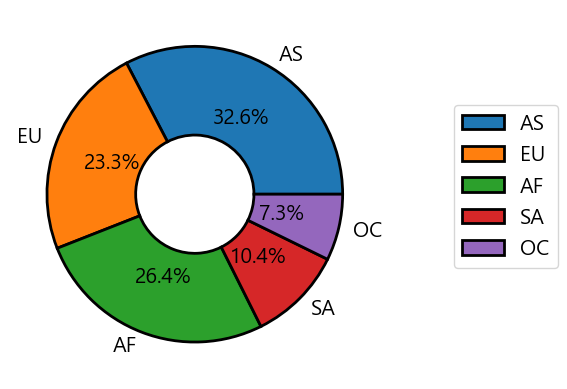

In [ ]:
index = df['continent'].fillna(method='ffill').unique()
index
values = df.groupby('continent')['total_servings'].sum()
values
wedgeprops = {'width': 0.6, 'edgecolor':'black', 'linewidth': 2}
plt.pie(values, labels=index, wedgeprops=wedgeprops, autopct='%.1f%%')
plt.legend(loc=(1.2, 0.3))
plt.show()